In [2]:
#this is a copy of the kernel ready submission for copy paste purposes cuz you can't undo a delete code apparently 
#SHUDDER 

#importing the necessary modules into the notebook

import pandas
import time
import numpy as np
from collections import Counter
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
#Reading in the csv and converting to dataframe. 

csv_file = r'/Users/davidferreira/Documents/coding_2/kaggle_datasets/911_emergency_calls/911.csv'
data = pandas.read_csv(csv_file)

In [4]:
data.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 16:56:52,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1


In [5]:
data.shape

(150416, 9)

In [6]:
#Let's first see the most frequently occuring time for cop calls 

timesp = data['timeStamp']
time_2 = [str(i) for i in timesp]
time_only = [int(i[11:13]) for i in time_2]

In [7]:
#between 4 and 5 p.m. is the time most calls to 911 are placed. (2015-2017)

time_count = Counter(time_only).most_common()

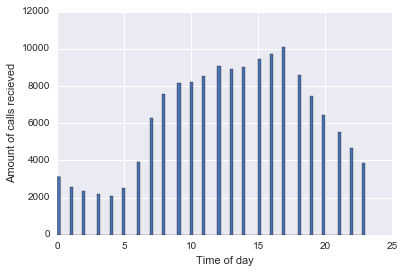

In [8]:
#plot of frequency of occurence of calls by time
#as you can see there aren't many calls from midnight to around 6 am after which it spikes till 5 pm.

plt.hist(time_only, bins=100)
plt.xlabel('Time of day')
plt.ylabel('Amount of calls recieved')
plt.show()

As you can see from the plot above, the busiest time for calls is between 4 and 5pm, with a sharp spike in calls coming in around 6am with traffic accidents being the most likely type of call to come in at the time. 

In [9]:
#we shall now find the most frequently occuring kind of emergency call

call_type = [i for i in data['title']]
tp_count = Counter(call_type).most_common()

#vehicle accident is the most frequent kind of emergency

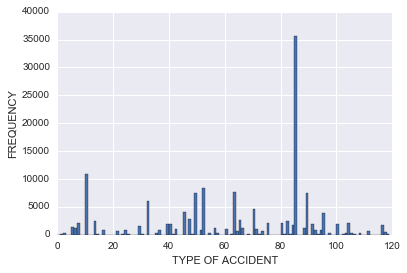

In [10]:
#bar chart showing frequency of call types
#as you can see it's imbalanced with the vehicle accidents dominating the chart. 

labels, values = zip(*Counter(call_type).items())

indexes = np.arange(len(labels))
width = 1

plt.bar(indexes, values, width)
plt.xlabel('TYPE OF ACCIDENT')
plt.ylabel('FREQUENCY')
#plt.xticks(indexes + width * 0.5, labels)
plt.show()

In the chart above, we can see a vehicle accidents dominating the chart as the most frequent type of emergency by a large margin, followed by disabled vehicles and fire alarms. With that many traffic accidents happening, it might be worth it for the Montgomery County PA to divert more of it's resources to controlling traffic, especially around the evening to bring that figure down, or to have a seperate call line for traffic accidents so that the rest of the department can focus more on the other issues which have frequencies in a more manageble range. 

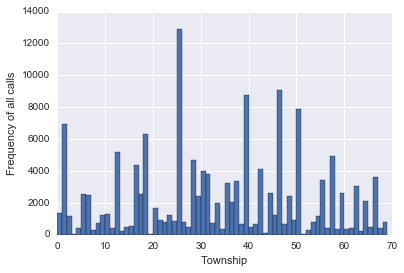

In [11]:
township = [i for i in data['twp']]

labels, values = zip(*Counter(township).items())

indexes = np.arange(len(labels))
width = 1

plt.bar(indexes, values, width)
plt.xlabel('Township')
plt.ylabel('Frequency of all calls')
#plt.xticks(indexes + width * 0.5, labels)
plt.show()

The township with the most calls to the police is Lower Merion, which is leading by quite a bit as seen by the histogram above, followed by Abington and Norristown respectively. Vehicle accidents, as expected dominate the type of call, followed by fire alarms going off in Lower Merion. Measures should be taken to increase fire proofing or lower the occurence of false fire alarms going off in the county, as it's the third leading cause for emergency calls county-wide and the second one in Merion alone, next to accidents which seem to be the biggest problem.

In [12]:
merion_df = data[data['twp']=='LOWER MERION']

In [13]:
merion_call_count = Counter(merion_df['title']).most_common()

In [14]:
merion_count_df = pandas.DataFrame()
type_lst = [i[0] for i in merion_call_count]
count_lst = [i[1] for i in merion_call_count]
merion_count_df['call type'] = type_lst
merion_count_df['frequency'] = count_lst

In [15]:
##list of call types to Merion by frequency

merion_count_df

,call type,frequency
0,Traffic: VEHICLE ACCIDENT -,3629
1,Fire: FIRE ALARM,1179
2,Traffic: DISABLED VEHICLE -,1169
3,Traffic: ROAD OBSTRUCTION -,614
4,EMS: VEHICLE ACCIDENT,555
5,EMS: FALL VICTIM,514
6,EMS: CARDIAC EMERGENCY,423
7,EMS: RESPIRATORY EMERGENCY,409
8,EMS: HEAD INJURY,328
9,EMS: UNKNOWN MEDICAL EMERGENCY,249


In [16]:
time_slice = [i[11:13] for i in data['timeStamp']]
data_time = data.copy()
data_time['time'] = time_slice

In [25]:
#building average number of accidents in category per day. 

date = [i[:10] for i in data['timeStamp']]
data_time['date'] = date
date_set = set()
for i in data_time['date']:
    date_set.add(i)
    
day_by_day = []
for i in date_set:
    day_by_day.append(Counter(data_time['title'][data_time['date'] == i]))

title_set = set()
for i in data_time['title']:
    title_set.add(i)

title_set_lst = [i for i in title_set]



In [26]:
#function to extract daily average given input emergency type (title)


def get_title_mean(x):
    title_eg = []
    for i in day_by_day:
        title_eg.append(i[x])
    
    title_np = np.array(title_eg)
    return title_np.mean()

In [27]:
#Dataframe of daily average of each type of emergency. 

titles = []
averages = []
for i in title_set_lst:
    titles.append(i)
    averages.append(get_title_mean(i))

avgs_df = pandas.DataFrame()
avgs_df['Emergency Type'] = titles
avgs_df['Daily Average'] = averages

avgs_df

,Emergency Type,Daily Average
0,EMS: BOMB DEVICE FOUND,0.002571
1,Fire: DEBRIS/FLUIDS ON HIGHWAY,0.226221
2,EMS: CHOKING,0.709512
3,Fire: RESCUE - TECHNICAL,0.030848
4,EMS: SUSPICIOUS,0.005141
5,Traffic: HAZARDOUS ROAD CONDITIONS -,3.696658
6,EMS: BACK PAINS/INJURY,2.992288
7,EMS: ABDOMINAL PAINS,5.544987
8,Fire: DIABETIC EMERGENCY,0.002571
9,EMS: DISABLED VEHICLE,0.002571


In [77]:
#function to give you the total frequency of call type based on the range of time of day by the hour. 
#for example, a total of 7006 vehicle accidents have occured between 12pm and 3pm from Dec 2015 to Feb 2017. 

def get_freq_by_time(start_t, end_t):
    emr = []
    emr_df = data_time['title'].as_matrix()
    time_df = data_time['time'].as_matrix()
    for i, b in zip(emr_df, time_df):
        if int(b) in range(start_t, end_t):
            emr.append(i)
    freq = Counter(emr).most_common()
    freq_titles = [i[0] for i in freq]
    freq_freq = [i[1] for i in freq]
    freq_df = pandas.DataFrame()
    freq_df['Type of Emergency'] = freq_titles
    freq_df['Frequency'] = freq_freq
    
    plt.hist(freq_freq, bins=110)
    plt.show()
    return freq_df
    

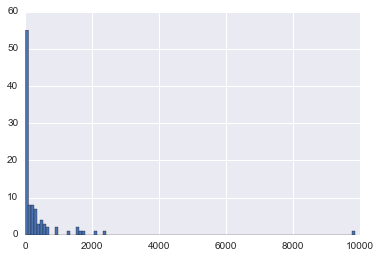

,Type of Emergency,Frequency
0,Traffic: VEHICLE ACCIDENT -,9855
1,Traffic: DISABLED VEHICLE -,2367
2,Fire: FIRE ALARM,2079
3,EMS: CARDIAC EMERGENCY,1767
4,EMS: FALL VICTIM,1686
5,EMS: VEHICLE ACCIDENT,1588
6,EMS: RESPIRATORY EMERGENCY,1588
7,Traffic: ROAD OBSTRUCTION -,1310
8,EMS: HEAD INJURY,965
9,EMS: SUBJECT IN PAIN,912


In [78]:
get_freq_by_time(12, 16)